In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zfone = pd.read_csv("Zfone.csv")

In [3]:
zfone.head()

,min_fpktl,mean_fpktl,max_fpktl,std_fpktl,min_bpktl,mean_bpktl,max_bpktl,std_bpktl,min_fiat,mean_fiat,...,mean_biat,max_biat,std_biat,duration,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,class
0,40,55,123,33,40,136,414,185,547,196970,...,274569,703487,375882,984851,6,6,335,4,546,ZFONE
1,40,73,161,58,52,150,249,139,228,98243,...,161425,161425,0,294730,6,4,293,2,301,ZFONE
2,40,66,161,53,40,94,247,101,294,51030,...,68549,121763,62154,286660,6,5,333,4,379,ZFONE
3,40,97,266,92,40,320,1359,506,308,92852,...,103912,445511,158869,821078,6,9,880,8,2565,ZFONE
4,40,237,1211,477,40,673,1500,722,207,38775,...,39589,121720,56267,268906,6,6,1423,6,4038,ZFONE


In [4]:
data = zfone.iloc[:, 17:]

In [5]:
data.head()

,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,class
0,6,6,335,4,546,ZFONE
1,6,4,293,2,301,ZFONE
2,6,5,333,4,379,ZFONE
3,6,9,880,8,2565,ZFONE
4,6,6,1423,6,4038,ZFONE


In [6]:
data.shape

(29961, 6)

In [7]:
datasets = data.rename(columns = {"total_fvolume" : "fvol", 
                                  "total_fpackets": 'fpac', 
                                  "total_bpackets": "bpac",
                                  "total_bvolume":"bvol"})

In [8]:
datasets.head()

,proto,fpac,fvol,bpac,bvol,class
0,6,6,335,4,546,ZFONE
1,6,4,293,2,301,ZFONE
2,6,5,333,4,379,ZFONE
3,6,9,880,8,2565,ZFONE
4,6,6,1423,6,4038,ZFONE


In [9]:
datasets['proto'].value_counts()

17    18666
6     11295
Name: proto, dtype: int64

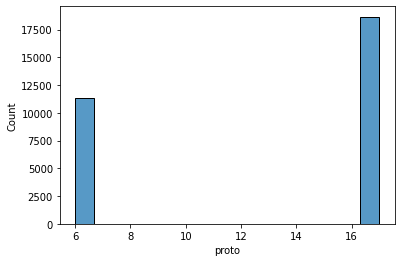

In [10]:
sns.histplot(datasets["proto"])
plt.show()

In [11]:
datasets.describe()

,proto,fpac,fvol,bpac,bvol
count,29961.000000,29961.000000,2.996100e+04,29961.000000,2.996100e+04
mean,12.853109,4813.040352,7.636447e+05,1766.863022,9.001921e+04
std,5.331045,18992.424114,2.948771e+06,6389.174741,3.174704e+05
min,6.000000,1.000000,5.600000e+01,0.000000,0.000000e+00
25%,6.000000,10.000000,1.276000e+03,3.000000,2.450000e+02
50%,17.000000,61.000000,4.036000e+03,53.000000,3.298000e+03
75%,17.000000,155.000000,1.052200e+04,190.000000,1.069300e+04
max,17.000000,149100.000000,2.174054e+07,45772.000000,2.263520e+06


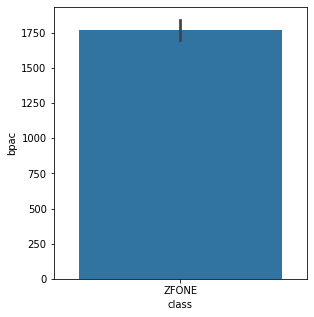

In [12]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot(x = datasets['class'], y = datasets['bpac'])
plt.show()

In [13]:
cls= (datasets["proto"] == 6)

In [14]:
datasets = datasets.drop("class",axis = 1)

In [15]:
datasets = datasets.drop("proto",axis = 1)

In [16]:
datasets["class"] = cls

In [44]:
datasets.head()

,fpac,fvol,bpac,bvol,class
0,6,335,4,546,True
1,4,293,2,301,True
2,5,333,4,379,True
3,9,880,8,2565,True
4,6,1423,6,4038,True


In [48]:
cor = datasets.corr()
cor["fvol"].sort_values(ascending = False)

fvol     1.000000
bpac     0.998339
bvol     0.997497
fpac     0.995218
class   -0.199856
Name: fvol, dtype: float64

In [18]:
datasets["class"].value_counts(normalize=True)

False    0.62301
True     0.37699
Name: class, dtype: float64

# MODEL 01

In [19]:
x = datasets.drop("class", axis = 1)
y = datasets[["class"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.3,random_state = 42)
from sklearn.linear_model import LogisticRegression
dt = LogisticRegression()
dt.fit(x_train,y_train)

e:\softwares\python setup\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
y_pred = dt.predict(x_test)
y_pred[:5]

array([False,  True, False,  True,  True])

In [21]:
y_test.head()

,class
11960,False
1804,True
516,False
3813,True
22211,True


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_test, y_pred)

array([[5514,  100],
       [ 392, 2983]], dtype=int64)

In [24]:
(5514+2983)/(5514+2983+392+100)

0.9452664367560352

#      MODEL 02

In [42]:
x = datasets.drop("class", axis = 1)
y = datasets[["class"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.3, random_state = 42, stratify = y)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier() 
dt1.fit(x_train,y_train)
y_pred = dt1.predict(x_test)
y_pred[:5]

array([False,  True, False, False, False])

In [27]:
# dt1 = DecisionTreeClassif ier() dt1.fit(x_train,y_train) y_pred = dt1.predict(x_test) y_pred[:5]

In [28]:
y_test.head()

,class
16137,False
18440,True
2039,False
26238,False
16214,False


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[5597,    3],
       [   3, 3386]], dtype=int64)

In [30]:
(5597+3386)/(5597+3386+3+3)

0.999332517521415

# REGRASSION

In [31]:
y = datasets[["bpac"]]
x = datasets[["bvol"]]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 42)

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dtr = DecisionTreeRegressor()

In [36]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [37]:
y_pred = dtr.predict(x_test)

In [38]:
y_pred[:5]

array([  2.        ,  66.81818182,  27.        , 407.        ,
       246.5       ])

In [39]:
y_test.head()

,bpac
11960,2
1804,36
516,15
3813,407
22211,335


In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


14393.237790619276